In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("ticks")
sns.set_context("talk")
sns.set_palette("colorblind")

In [8]:
df_peng = sns.load_dataset("penguins")
df_peng.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


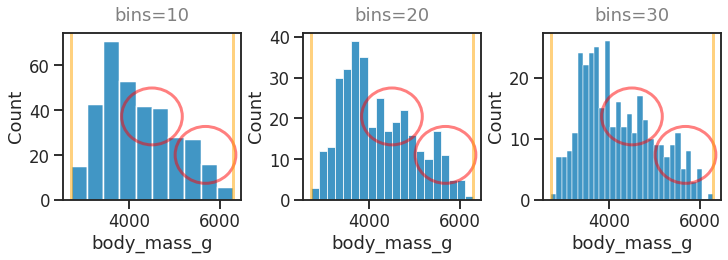

In [45]:
from matplotlib.patches import Circle

vmin, vmax = df_peng["body_mass_g"].min(), df_peng["body_mass_g"].max() 

fig, axs = plt.subplots(ncols=3, figsize=(10, 3.5), constrained_layout=True)

for i, ax in enumerate(axs, 1):
    sns.histplot(x="body_mass_g", data=df_peng, bins=10*i, ax=ax)
    ax.set_title(f"bins={10*i}", pad=12, color="gray")
    
    ymin, ymax = ax.get_ylim()
    
    # changes
    circle0 = Circle((0.5, 0.5), 0.17, fc="none", ec="r", lw=3, alpha=0.5, transform=ax.transAxes)
    circle1 = Circle((0.8, 0.27), 0.17, fc="none", ec="r", lw=3, alpha=0.5, transform=ax.transAxes)
    ax.add_patch(circle0)
    ax.add_patch(circle1)
    
    # data min, max
    ax.axvline(vmin, c="orange", lw=3, alpha=0.5)
    ax.axvline(vmax, c="orange", lw=3, alpha=0.5)
    
fig.savefig("102_kdeplot_01.png")

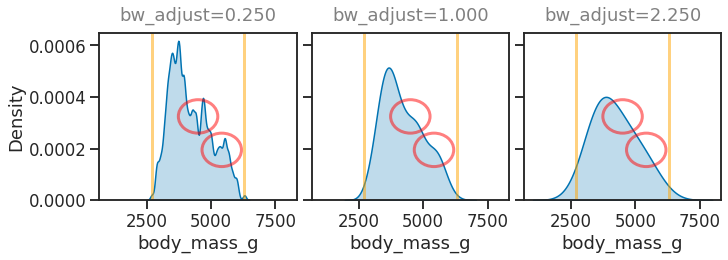

In [91]:
fig, axs = plt.subplots(ncols=3, figsize=(10, 3.5), constrained_layout=True, 
                        sharex=True, sharey=True)

for i, ax in enumerate(axs, 1):
    sns.kdeplot(x="body_mass_g", data=df_peng, bw_adjust=i**2/4, fill=True, ax=ax)
    ax.set_title(f"bw_adjust={i**2/4:.3f}", pad=12, color="gray")
    
    ymin, ymax = ax.get_ylim()

    # changes
    circle0 = Circle((0.5, 0.5), 0.1, fc="none", ec="r", lw=3, alpha=0.5, transform=ax.transAxes)
    circle1 = Circle((0.62, 0.3), 0.1, fc="none", ec="r", lw=3, alpha=0.5, transform=ax.transAxes)
    ax.add_patch(circle0)
    ax.add_patch(circle1)
    
    # data min, max
    ax.axvline(vmin, c="orange", lw=3, alpha=0.5)
    ax.axvline(vmax, c="orange", lw=3, alpha=0.5)

fig.savefig("102_kdeplot_02.png")

In [110]:
for i, ax in enumerate(axs):
    area = Polygon(axs[0].collections[0].get_paths()[0].vertices).area
    print(f"# area of KDE plot at axs[{i}] = {area:.3f}")

# area of KDE plot at axs[0]= 1.000
# area of KDE plot at axs[1]= 1.000
# area of KDE plot at axs[2]= 1.000


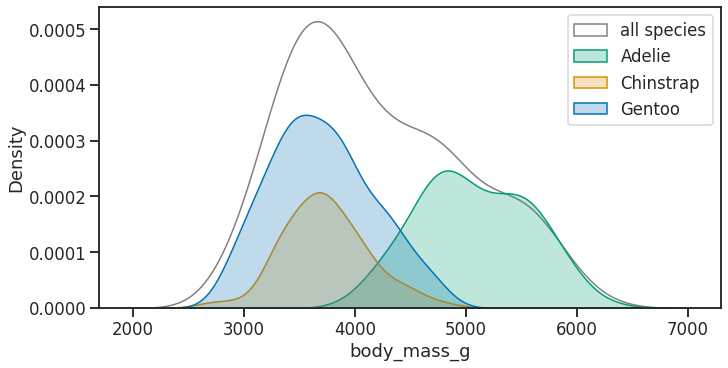

In [136]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)

sns.kdeplot(x="body_mass_g", data=df_peng, fill=True, ax=ax, ec="gray", fc="w")
sns.kdeplot(x="body_mass_g", data=df_peng, fill=True, hue="species", ax=ax)

xmin, xmax = ax.get_xlim()

# legend
handles = ax.get_children()[:4]
labels = ["all species", "Adelie", "Chinstrap", "Gentoo"]
ax.legend(handles=handles, labels=labels)

fig.savefig("102_kdeplot_03.png")

In [137]:
areas = []
for i, (p, label) in enumerate(zip(ax.get_children()[:4], labels)):
    area = Polygon(p.get_paths()[0].vertices).area
    areas.append(area)
    print(f"# area of KDE plot: {label} = {area:.3f}")

# area of KDE plot: all species = 1.000
# area of KDE plot: Adelie = 0.360
# area of KDE plot: Chinstrap = 0.199
# area of KDE plot: Gentoo = 0.441


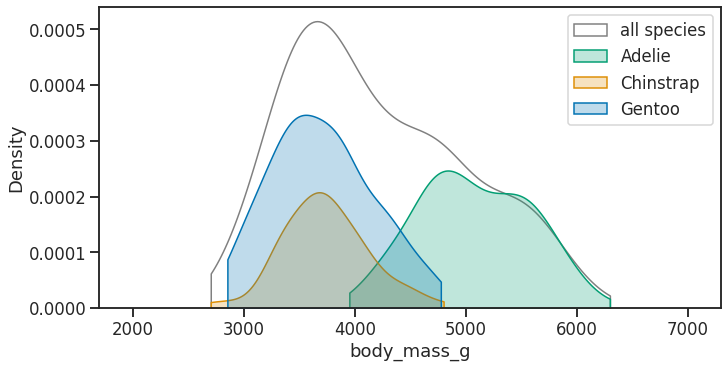

In [138]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)

sns.kdeplot(x="body_mass_g", data=df_peng, fill=True, ax=ax, ec="gray", fc="w", cut=0)
sns.kdeplot(x="body_mass_g", data=df_peng, fill=True, hue="species", ax=ax, cut=0)

ax.set_xlim(xmin, xmax)

# legend
handles = ax.get_children()[:4]
labels = ["all species", "Adelie", "Chinstrap", "Gentoo"]
ax.legend(handles=handles, labels=labels)

fig.savefig("102_kdeplot_04.png")

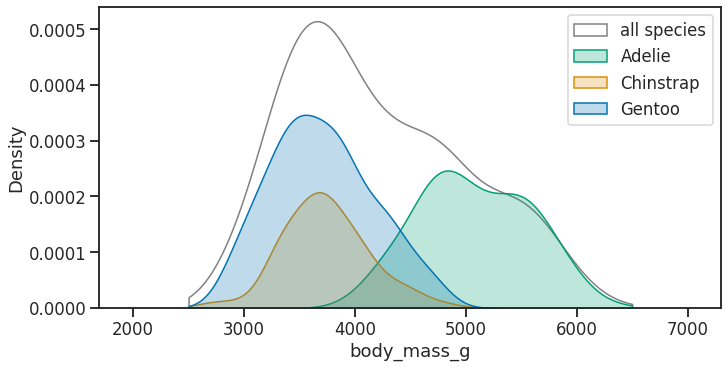

In [151]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)

sns.kdeplot(x="body_mass_g", data=df_peng, fill=True, ax=ax, ec="gray", fc="w", clip=(2500, 6500))
sns.kdeplot(x="body_mass_g", data=df_peng, fill=True, hue="species", ax=ax, clip=(2500, 6500))

ax.set_xlim(xmin, xmax)

# legend
handles = ax.get_children()[:4]
labels = ["all species", "Adelie", "Chinstrap", "Gentoo"]
ax.legend(handles=handles, labels=labels)

fig.savefig("102_kdeplot_09.png")

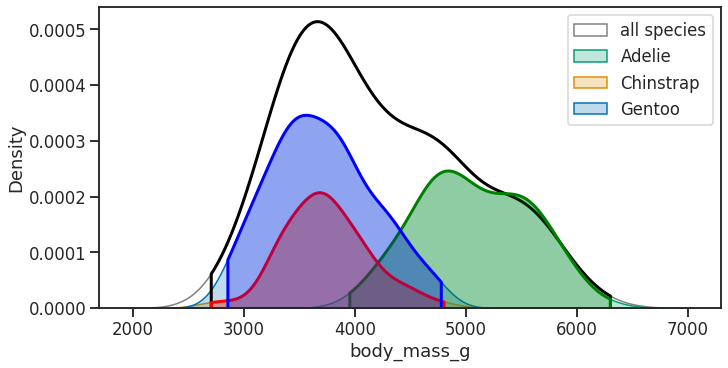

In [147]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)

# without cut=0
sns.kdeplot(x="body_mass_g", data=df_peng, fill=True, ax=ax, ec="gray", fc="w")
sns.kdeplot(x="body_mass_g", data=df_peng, fill=True, hue="species", ax=ax)

# with cut=0
sns.kdeplot(x="body_mass_g", data=df_peng, fill=True, ax=ax, lw=3, ec="k", fc="#FFFFFF00", cut=0)
sns.kdeplot(x="body_mass_g", data=df_peng, fill=True, hue="species", ax=ax, 
            cut=0, lw=3, palette=["b", "r", "g"])

# legend
handles = ax.get_children()[:4]
labels = ["all species", "Adelie", "Chinstrap", "Gentoo"]
ax.legend(handles=handles, labels=labels)

fig.savefig("102_kdeplot_05.png")

In [150]:
for i, (p, label, a) in enumerate(zip(ax.get_children()[4:8], labels, areas)):
    area = Polygon(p.get_paths()[0].vertices).area
    print(f"# area of KDE plot: {label} = {area:.3f} (cf. {a:.3f})")

# area of KDE plot: all species = 0.986 (cf. 1.000)
# area of KDE plot: Adelie = 0.353 (cf. 0.360)
# area of KDE plot: Chinstrap = 0.195 (cf. 0.199)
# area of KDE plot: Gentoo = 0.423 (cf. 0.441)
